## Bagging and Voting

感觉上，assemble就是倒来倒去。三个臭皮匠，顶得上一个诸葛亮。只是三个皮匠的组合方式不同而已。  
文中掷骰子的例子，其实更加科学一点。就是想办法*增加*数据集的**大小**。因为数据集越大，那么随机的影响就越小。

- Voting就是N个predictor预测一组数据，把预测的数据，按照一个规则进行vote
    - hard: 出现最多
    - soft：概率最高
- bagging： 就是用一个predictor，把数据分成N份，来训练N个模型。然后取众数。然后N份有放回操作
    - oob(out of bag): 在sklearn里面的这个，可以理解为自然形成的一个测试集
        - [资料一](https://stackoverflow.com/questions/33631125/scikit-learn-parameters-oob-score-oob-score-oob-prediction)
        - [资料二](https://www.jianshu.com/p/9420ebfd05bd)
- pasting：形成数据N的时候，资料并不放回。

In [33]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting= 'hard'
)

X,y = make_moons(500,noise=0.4,random_state=18)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [34]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.8
RandomForestClassifier 0.84
SVC 0.82
VotingClassifier 0.83


In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    max_samples=100,bootstrap=True,n_jobs=1,oob_score=True
)

bag_clf.fit(X_train,y_train)
y_pred - bag_clf.predict(X_test)
print("bag accuracy is ",accuracy_score(y_test,y_pred))

bag accuracy is  0.83


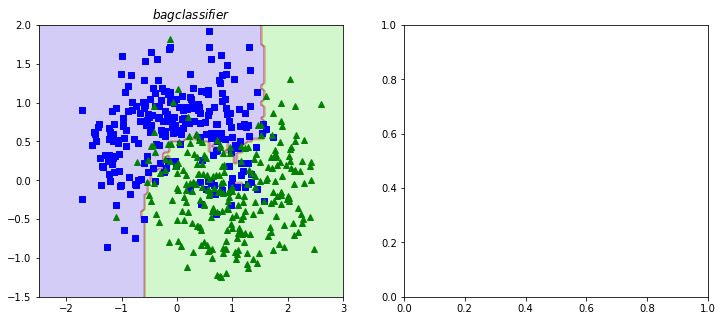

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(ax, clf_plot, x_value, y_value,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1= np.meshgrid(x0s,x1s)
    x_plot = np.c_[x0.ravel(),x1.ravel()]
    y_pred_plot = clf_plot.predict(x_plot).reshape(x0.shape)
    ax.contourf(x0,x1,y_pred_plot,cmap=plt.cm.brg, alpha=0.2)
    ax.plot(x_value[:, 0][y_value==0], x_value[:, 1][y_value==0], "bs")
    ax.plot(x_value[:, 0][y_value==1], x_value[:, 1][y_value==1], "g^")

fig, axs = plt.subplots(1,2,figsize=(12, 5))
axis_size = [-2.5,3,-1.5,2.0]
plot_predictions(axs[0],bag_clf,X,y,axis_size)
axs[0].set_title(r"$bag classifier$",)
plt.show()

In [38]:
bag_clf.oob_score_

0.8375

## Random Forests

In [39]:
from sklearn.ensemble import  RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [42]:
y_pred_rf = rnd_clf.predict(X_test)
print("random forest accuracy", accuracy_score(y_test,y_pred_rf))

random forest accuracy 0.83


In [43]:
rnd_clf.feature_importances_

array([0.42105104, 0.57894896])

## Boosting

### Ada boosting

首先，是一个线性的过程。找到那些**难**的sample。然后让下一棒，注意这些难的**sample**

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=200,
    algorithm="SAMME.R",learning_rate= 0.5
)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

## Gradient Boosting

和Ada差不多。只是通过之前的残差做之后的权重。而不是难易度。
用的是

- `GradientBoostingRegressor`
    - 在使用的时候，可以用early stop来降低成本等。
- 'xgboost'

## statcking

这个方法，感觉这里是强制三层。

看了一些资料。这个方法的核心，还是上一层的预测值，成为下一层的feature。每一层，可以是多个predictor，但是最后输出层，最好是一个。

参考资料

- [python实现](https://www.jianshu.com/p/5905f19c4df6)
- [各种assemble的详细解析](https://www.jianshu.com/p/46ccf40222d6)
